In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv('/content/Data.csv')

In [ ]:
dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
dataframe.describe()

,Quantity,UnitPrice,CustomerID
count,163173.000000,163173.000000,113614.000000
mean,9.048568,5.058745,15287.524390
std,265.616357,98.669623,1732.896383
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13842.000000
50%,3.000000,2.460000,15190.500000
75%,10.000000,4.210000,16843.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163174 entries, 0 to 163173
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    163174 non-null  object 
 1   StockCode    163174 non-null  object 
 2   Description  162544 non-null  object 
 3   Quantity     163173 non-null  float64
 4   InvoiceDate  163173 non-null  object 
 5   UnitPrice    163173 non-null  float64
 6   CustomerID   113614 non-null  float64
 7   Country      163173 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.0+ MB


In [ ]:
dataframe.isnull().sum()

InvoiceNo          0
StockCode          0
Description      630
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     49560
Country            1
dtype: int64

In [ ]:
dataframe.dropna(inplace= True)

In [ ]:
dataframe.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
dataframe['InvoiceDate']=pd.to_datetime(dataframe['InvoiceDate'])

In [ ]:
dataframe['CustomerID']=dataframe['CustomerID'].astype('int')

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113614 entries, 0 to 163105
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    113614 non-null  object        
 1   StockCode    113614 non-null  object        
 2   Description  113614 non-null  object        
 3   Quantity     113614 non-null  float64       
 4   InvoiceDate  113614 non-null  datetime64[ns]
 5   UnitPrice    113614 non-null  float64       
 6   CustomerID   113614 non-null  int64         
 7   Country      113614 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.8+ MB


In [ ]:
dataframe.query('UnitPrice <=0 or Quantity <=0').count()

InvoiceNo      2867
StockCode      2867
Description    2867
Quantity       2867
InvoiceDate    2867
UnitPrice      2867
CustomerID     2867
Country        2867
dtype: int64

In [ ]:
filtro_preco = dataframe['UnitPrice'] > 0
filtro_quantidade = dataframe['Quantity'] > 0

In [ ]:
dataframe = dataframe[filtro_preco & filtro_quantidade]

In [ ]:
dataframe['TotalPrice'] = dataframe['UnitPrice'] * dataframe['Quantity']

In [ ]:
dataframe.duplicated().sum()

1421

In [ ]:
dataframe.drop_duplicates(inplace=True)

<Axes: xlabel='UnitPrice', ylabel='Count'>

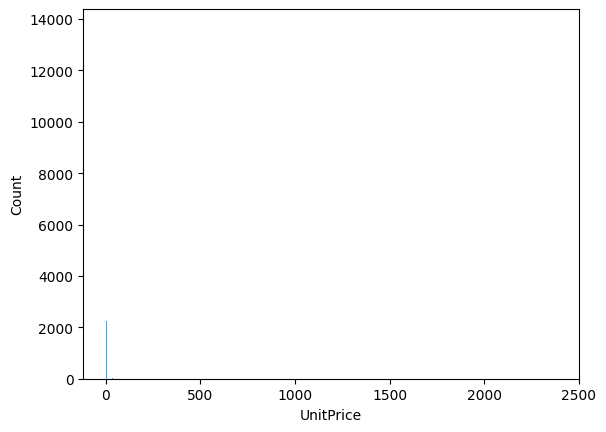

In [ ]:
sns.histplot(data=dataframe, x='UnitPrice')

<Axes: xlabel='UnitPrice'>

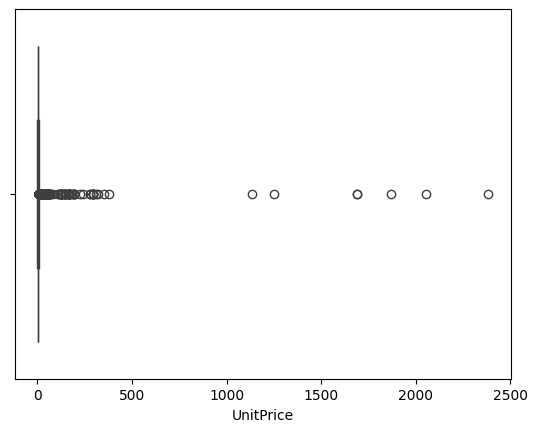

In [ ]:
sns.boxplot(data=dataframe, x='UnitPrice')

<Axes: >

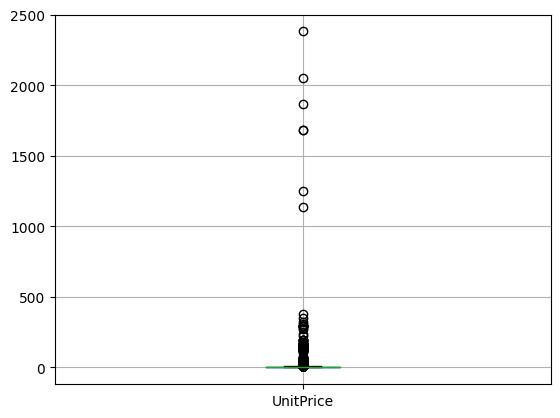

In [ ]:
dataframe.boxplot(column='UnitPrice')

<Axes: >

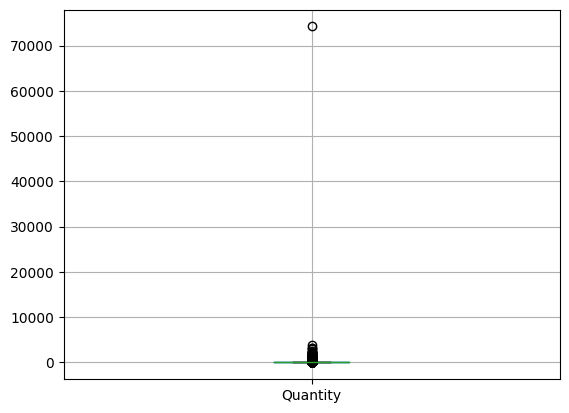

In [ ]:
dataframe.boxplot(column='Quantity')

In [ ]:
filtro_preco = dataframe['UnitPrice'] <5000
filtro_quantidade = dataframe['Quantity'] <10000
dataframe = dataframe[filtro_preco & filtro_quantidade]

<Axes: >

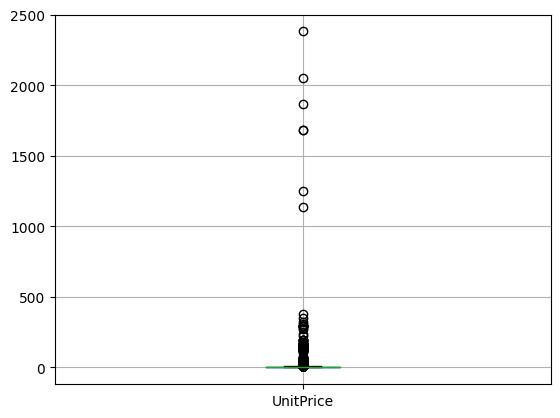

In [ ]:
dataframe.boxplot(column='UnitPrice')

In [ ]:
ultima_compra = dataframe['InvoiceDate'].max()

In [ ]:
top_10_paises = dataframe.groupby('Country').sum('TotalPrice').sort_values(by='TotalPrice', ascending=False).head(10)

<Axes: xlabel='TotalPrice', ylabel='Country'>

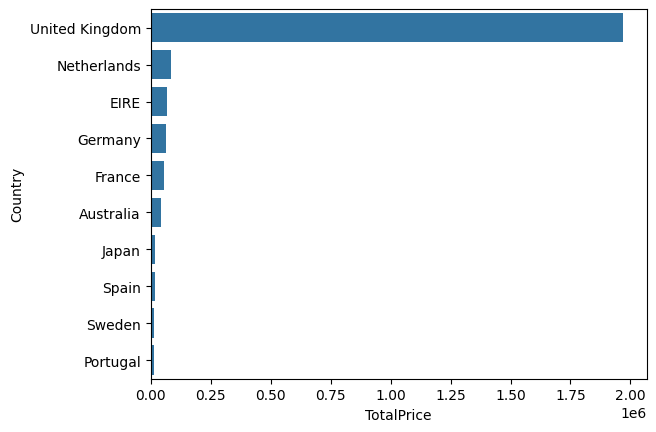

In [ ]:
sns.barplot(data=top_10_paises, y='Country', x='TotalPrice')

In [ ]:
top_10_produtos = dataframe.groupby('StockCode').sum('Quantity').sort_values(by='Quantity', ascending=False).head(10)

<Axes: xlabel='Quantity', ylabel='StockCode'>

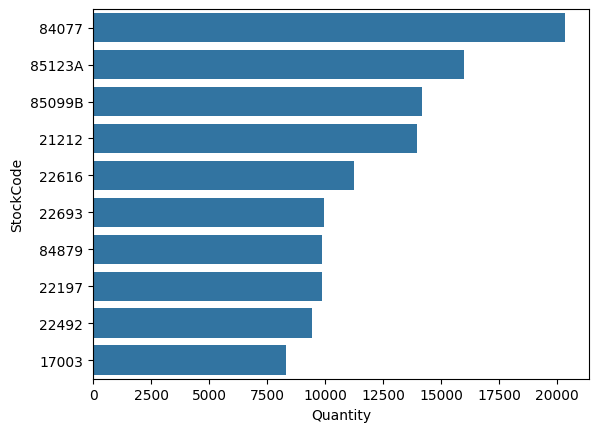

In [ ]:
sns.barplot(data=top_10_produtos, y='StockCode', x='Quantity')

In [ ]:
Mes_compra = dataframe['InvoiceDate'].dt.month

In [ ]:
vendas_por_mes = dataframe.groupby(Mes_compra).sum('TotalPrice')

In [ ]:
print(dataframe.groupby(Mes_compra).sum('TotalPrice').sort_values(by='TotalPrice', ascending=False))

             Quantity  UnitPrice  CustomerID  TotalPrice
InvoiceDate                                             
3            347582.0   87864.79   407858866   594081.76
12           311048.0   80679.60   398371675   570422.73
1            274258.0   66233.61   318054973   490917.71
2            265027.0   62619.48   301727994   446084.92
4            201893.0   58344.09   245375164   335849.97


<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

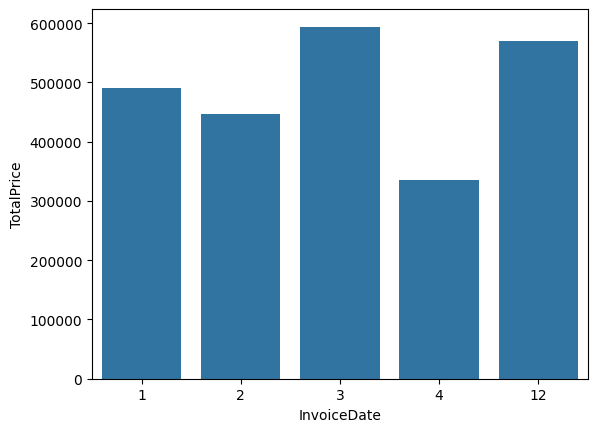

In [ ]:
sns.barplot(data=vendas_por_mes, x='InvoiceDate', y='TotalPrice')

In [ ]:
vendas_mes_pais = dataframe.groupby([Mes_compra,'Country']).sum('TotalPrice').sort_values(by='TotalPrice', ascending=False).head(10)

<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

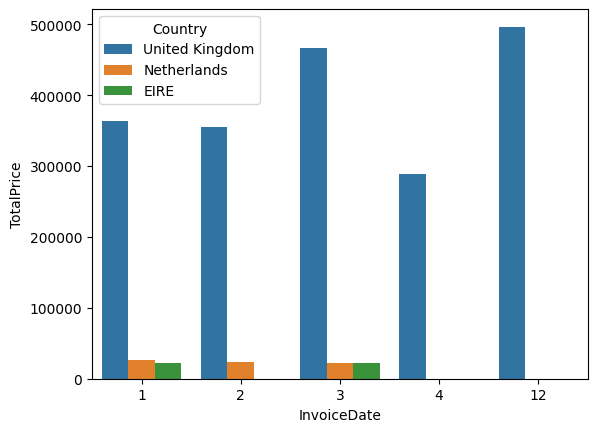

In [ ]:
sns.barplot(data=vendas_mes_pais, x='InvoiceDate', y='TotalPrice', hue='Country')

In [ ]:
tabela_auxiliar=dataframe.groupby(['InvoiceDate','CustomerID']).sum('TotalPrice')

In [ ]:
tabela_calculo_rfm=tabela_auxiliar.groupby('CustomerID').sum('TotalPrice')

In [ ]:
tabela_calculo_rfm['F'] = tabela_auxiliar['Quantity'].groupby('CustomerID').count()

In [ ]:
tabela_calculo_rfm['M'] = tabela_auxiliar['TotalPrice'].groupby('CustomerID').mean('TotalPrice')

In [ ]:
tabela_auxiliar.reset_index(inplace = True)

In [ ]:
tabela_auxiliar['R'] = ultima_compra-tabela_auxiliar['InvoiceDate']

In [ ]:
tabela_auxiliar.drop(columns=['InvoiceDate','Quantity','UnitPrice','TotalPrice'], inplace=True)

In [ ]:
tabela_auxiliar.groupby('CustomerID')['R'].min()

CustomerID
12347   12 days 00:44:00
12348   14 days 00:40:00
12350   75 days 19:26:00
12352   27 days 19:19:00
12356   10 days 22:54:00
              ...       
18270   31 days 22:46:00
18272   12 days 01:52:00
18273   23 days 00:05:00
18280   43 days 01:35:00
18283   50 days 00:57:00
Name: R, Length: 2356, dtype: timedelta64[ns]

In [ ]:
tabela_calculo_rfm['R'] = tabela_auxiliar.groupby('CustomerID')['R'].min()

In [ ]:
tabela_calculo_rfm.head()

,Quantity,UnitPrice,TotalPrice,F,M,R
CustomerID,,,,,,
12347,1117.0,225.05,1823.43,3,607.810000,12 days 00:44:00
12348,2124.0,136.21,1487.24,3,495.746667,14 days 00:40:00
12350,197.0,65.30,334.40,1,334.400000,75 days 19:26:00
12352,254.0,1043.08,1561.81,5,312.362000,27 days 19:19:00
12356,1586.0,165.17,2753.08,2,1376.540000,10 days 22:54:00
